In [2]:
!pip install textblob
# if there is an error with the installation use install with conda in the Anaconda console
!pip install wordcloud
!pip install emoji==2.2.0

     ---------------------------------------- 0.0/240.9 kB ? eta -:--:--
     ---- -------------------------------- 30.7/240.9 kB 660.6 kB/s eta 0:00:01
     ----------------------------------- -- 225.3/240.9 kB 2.8 MB/s eta 0:00:01
     -------------------------------------- 240.9/240.9 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234936 sha256=bf0e8024c8fdf90e64a6db006429d8575cd94d2c96be673aab3f73afd8db7e49
  Stored in directory: c:\users\fernandogomez\appdata\local\pip\cache\wheels\a1\d5\63\4dbdee6f4e23f24b771ea5ac6c9ebe3d7e227028c60e06ead3
Successfully built emoji
  Attempting uninstall: emoji
    Found existing installation: emoji 2.12.1
    Uninstalling emoji-2.12.1:
      Successfully uninstalled emoji-2.12.1


In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import emoji
from collections import Counter
import plotly.graph_objs as go
from plotly.offline import iplot

In [35]:
emoji.__version__

'2.0.3'

In [4]:
comments_df = pd.read_csv(r'C:\projects_windows\cursos\REAL WORLD PROJECTS - DATA ANALYTICS\resources\UScomments.csv', on_bad_lines='skip')

C:\Users\FernandoGomez\AppData\Local\Temp\ipykernel_10464\808168332.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  comments_df = pd.read_csv(r'C:\projects_windows\cursos\REAL WORLD PROJECTS - DATA ANALYTICS\resources\UScomments.csv', on_bad_lines='skip')


In [5]:
comments = comments_df[0:100000].copy()

In [6]:
comments.shape

(100000, 4)

In [7]:
comments.head()


,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [8]:
comments.isnull().sum()

video_id        0
comment_text    2
likes           0
replies         0
dtype: int64

In [9]:
comments.dropna(inplace=True)

In [10]:
comments.shape

(99998, 4)

In [11]:
comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [12]:
from textblob import TextBlob

In [13]:
comments.head(6)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0


In [14]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment


Sentiment(polarity=0.0, subjectivity=0.1)

In [15]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment.polarity

0.0

In [16]:
comments.shape

(99998, 4)

In [17]:
polarity = []

for comment in comments['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [18]:
len(polarity)

99998

In [19]:
comments['polarity'] = polarity
# comments.loc[:,'polarity'] = polarity

In [20]:
comments.head()

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


In [21]:
filter1 = comments['polarity'] == 1

In [22]:
filter1

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: polarity, Length: 99998, dtype: bool

In [23]:
comments_positive = comments[filter1]

In [24]:
filter2 = comments['polarity'] == -1


In [25]:
comments_negative = comments[filter2]

In [26]:
type(comments['comment_text'])

pandas.core.series.Series

In [27]:
# Convert Series to string
total_comments_positive = ' '.join(comments_positive['comment_text'])
total_comments_negative = ' '.join(comments_negative['comment_text'])

In [28]:
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [29]:
# wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_positive)
wordcloud_positive = WordCloud(stopwords=STOPWORDS).generate(total_comments_positive)

(-0.5, 399.5, 199.5, -0.5)

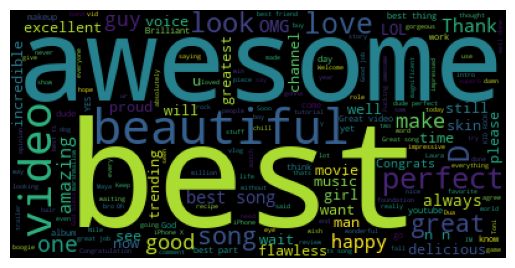

In [30]:
plt.imshow(wordcloud_positive)
plt.axis('off')

In [31]:
wordcloud_negative = WordCloud(stopwords=STOPWORDS).generate(total_comments_negative)

(-0.5, 399.5, 199.5, -0.5)

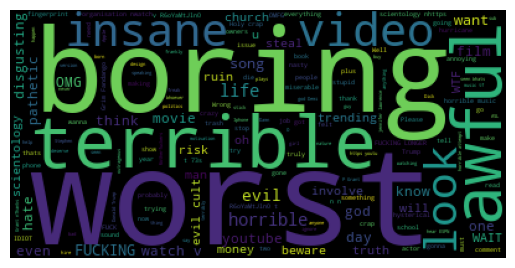

In [32]:
plt.imshow(wordcloud_negative)
plt.axis('off')

In [39]:
comment = 'trending 😉👍'

In [40]:
# list comprehension
[char for char in comment if char in emoji.EMOJI_DATA]

['😉', '👍']

In [42]:
emoji_list = []
for char in comment:
    if char in emoji.EMOJI_DATA:
        emoji_list.append(char)
emoji_list

['😉', '👍']

In [55]:
all_emojis_list = []

for comment in comments['comment_text'].dropna():
    for char in comment:
        if char in emoji.EMOJI_DATA:
            all_emojis_list.append(char)
        


In [56]:
len(all_emojis_list)
# all_emojis_list

41542

In [58]:
all_emojis_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [74]:
Counter(all_emojis_list).most_common(10)[0]

('😂', 5427)

In [78]:
Counter(all_emojis_list).most_common(10)[0][0]

'😂'

In [76]:
Counter(all_emojis_list).most_common(10)[::-1]

[('👍', 740),
 ('😘', 762),
 ('👏', 917),
 ('🔥', 935),
 ('💕', 1021),
 ('😭', 1131),
 ('😬', 2078),
 ('😍', 4167),
 ('❤', 4549),
 ('😂', 5427)]

In [79]:
emojis = [Counter(all_emojis_list).most_common(10)[i][0] for i in range(10)]

In [80]:
emojis

['😂', '❤', '😍', '😬', '😭', '💕', '🔥', '👏', '😘', '👍']

In [81]:
freqs = [Counter(all_emojis_list).most_common(10)[i][1] for i in range(10)]

In [82]:
freqs

[5427, 4549, 4167, 2078, 1131, 1021, 935, 917, 762, 740]

In [87]:
trace = go.Bar(x=emojis, y=freqs)

In [91]:
iplot([trace])

In [92]:
!git status


On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   .gitignore
	modified:   youtube_analysis.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	resources/

no changes added to commit (use "git add" and/or "git commit -a")
